### Import Libraries

In [1]:
!pip install xgboost

In [61]:
!pip install lightgbm

In [89]:
import xgboost as xgb
import lightgbm as lgbm
import pandas as pd

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Import Data

In [3]:
cancer=load_breast_cancer()

In [4]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target']=cancer.target

### Data Understanding

In [5]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
cancer_df.shape

(569, 31)

In [7]:
cancer_df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [8]:
cancer_df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

### Model Building

In [9]:
X=cancer_df.drop('target',axis=1)
y=cancer_df[['target']]

In [92]:
ss=StandardScaler()
X=ss.fit_transform(X)

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [95]:
dmatrix=xgb.DMatrix(data= X_train,label= y_train)

In [96]:
parameters={'max_depth':10,
            'objective':'binary:logistic',
            'eval_metric':'auc',
            'learning_rate':.05}

### Model Training

In [97]:
%%time
xgb_classifier=xgb.train(params=parameters,dtrain=dmatrix)

Wall time: 43.8 ms


### Model Testing

In [98]:
dtest=xgb.DMatrix(X_test)

In [99]:
y_pred_xgb=xgb_classifier.predict(dtest)
y_pred_xgb

array([0.6950028 , 0.30512938, 0.30512938, 0.6950028 , 0.6950028 ,
       0.30512938, 0.30512938, 0.42236546, 0.4434401 , 0.68501544,
       0.6873981 , 0.31491965, 0.6950028 , 0.37993956, 0.6950028 ,
       0.3209535 , 0.6950028 , 0.6950028 , 0.6950028 , 0.30512938,
       0.6950028 , 0.6950028 , 0.30512938, 0.6950028 , 0.6873981 ,
       0.6608546 , 0.6950028 , 0.6873981 , 0.6950028 , 0.30512938,
       0.6912981 , 0.6950028 , 0.5       , 0.6950028 , 0.6950028 ,
       0.6950028 , 0.43684837, 0.6950028 , 0.30512938, 0.6353723 ,
       0.6950028 , 0.30512938, 0.6950028 , 0.6950028 , 0.6124264 ,
       0.67040586, 0.67040586, 0.6873981 , 0.6950028 , 0.6950028 ,
       0.30512938, 0.30512938, 0.6747241 , 0.6124264 , 0.6950028 ,
       0.6950028 , 0.6950028 , 0.30512938, 0.31881908, 0.6950028 ,
       0.6950028 , 0.30512938, 0.30512938, 0.6873981 , 0.6950028 ,
       0.6873981 , 0.30512938, 0.33529702, 0.6950028 , 0.6950028 ,
       0.30815247, 0.30512938, 0.6950028 , 0.30512938, 0.68739

### Model Evaluation

In [100]:
#converting probabilities into 0 and 1. Setting threshold to 0.5

for i in range (0, X_test.shape[0]):
    if y_pred_xgb[i]>=.5:
        y_pred_xgb[i]=1
    else:
        y_pred_xgb[i]=0

In [101]:
cm=confusion_matrix(y_test,y_pred_xgb)

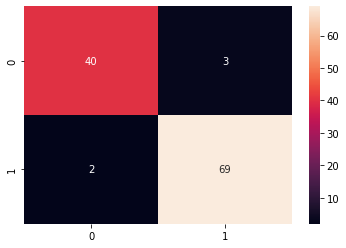

In [102]:
sns.heatmap(cm,annot=True)
plt.show()

In [103]:
accuracy_score(y_test,y_pred_xgb)

0.956140350877193

In [104]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [105]:
roc_auc_score(y_test,y_pred_xgb)

0.9510317720275139

### Gradient Boosting Algorithm

In [106]:
GBclassifier=GradientBoostingClassifier()

In [107]:
%%time
GBclassifier.fit(X_train,y_train)

Wall time: 509 ms


GradientBoostingClassifier()

In [108]:
y_pred_gb=GBclassifier.predict(X_test)

In [109]:
gb_cm=confusion_matrix(y_test,y_pred_gb)
gb_cm

array([[40,  3],
       [ 2, 69]], dtype=int64)

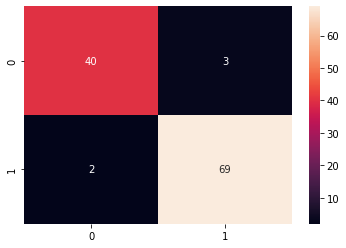

In [110]:
sns.heatmap(gb_cm,annot=True)
plt.show()

In [111]:
accuracy_score(y_test,y_pred_gb)

0.956140350877193

In [112]:
print(classification_report(y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [113]:
roc_auc_score(y_test,y_pred_gb)

0.9510317720275139

### Light Gradient Boosting Algorithm

In [114]:
train_x_y = lgbm.Dataset(data=X_train,label=y_train)

In [115]:
parameters={'learning_rate':0.05,
            'boosting_type':'gbdt',
            'objective':'binary',
            'metric':['auc','binary_logloss'],
            'num_leaves':100,
            'max_depth':10}

In [116]:
%%time
lgbm_classifier=lgbm.train(params=parameters,train_set=train_x_y)

[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000884 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4540
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [117]:
y_pred_lgbm=lgbm_classifier.predict(X_test)

In [118]:
#Converting probabilities into 0 and 1. Setting threshold as .5

for i in range(0, X_test.shape[0]):
    if y_pred_lgbm[i]>=.5:
        y_pred_lgbm[i]=1
    else:
        y_pred_lgbm[i]=0

In [119]:
cm_lgbm=confusion_matrix(y_test,y_pred_lgbm)
cm_lgbm

array([[40,  3],
       [ 1, 70]], dtype=int64)

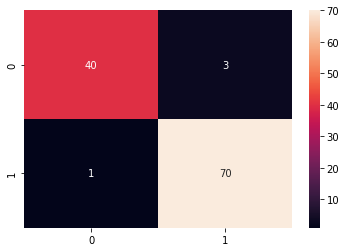

In [120]:
sns.heatmap(cm_lgbm,annot=True)
plt.show()

In [121]:
accuracy_score(y_test,y_pred_lgbm)

0.9649122807017544

In [122]:
print(classification_report(y_test,y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### End